# LSTM - word2vec sequence

- **Training set**: LO_SARD102 (95%) (0.75 split)
- **Test/Validation set:** LO_SARD102 (95%) (0.25 split)
- **Features**: word2vec sequence (100)
- **Class imbalance processing**: SMOTE

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from helper_functions import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

/home/scheuererra68323/venv37/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
X_train = numpy.load('/mnt/md0/user/scheuererra68323/LOSARD_w2vseq_SMOTE_X_train.npy', mmap_mode='r')
Y_train = numpy.load('/mnt/md0/user/scheuererra68323/LOSARD_w2vseq_SMOTE_Y_train.npy', mmap_mode='r')

X_val = numpy.load('/mnt/md0/user/scheuererra68323/LOSARD_w2vseq_X_val.npy', mmap_mode='r')
Y_val = numpy.load('/mnt/md0/user/scheuererra68323/LOSARD_w2vseq_Y_val.npy', mmap_mode='r')

X_test =  numpy.load('/mnt/md0/user/scheuererra68323/LOSARD_w2vseq_X_test.npy',  mmap_mode='r')
Y_test =  numpy.load('/mnt/md0/user/scheuererra68323/LOSARD_w2vseq_Y_test.npy',  mmap_mode='r')

print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)
print(X_test.shape)
print(Y_test.shape)

(191492, 100, 100)
(191492,)
(33215, 100, 100)
(33215,)
(33215, 100, 100)
(33215,)


In [3]:
train_gen = DataGenerator(_X=X_train, _y=Y_train, batch_size=2048)
val_gen =   DataGenerator(_X=X_val,   _y=Y_val,   batch_size=2048)
test_gen =  DataGenerator(_X=X_test,  _y=Y_test,  batch_size=2048)

## Build & train keras model

In [4]:
model = keras.Sequential()
model.add(layers.LSTM(64, input_shape=(100, 100), 
                      return_sequences=True))
model.add(layers.Dropout(0.1))
model.add( layers.TimeDistributed(layers.Dense(16)) )
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy']
             )

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 64)           42240     
_________________________________________________________________
dropout (Dropout)            (None, 100, 64)           0         
_________________________________________________________________
time_distributed (TimeDistri (None, 100, 16)           1040      
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1601      
Total params: 44,881
Trainable params: 44,881
Non-trainable params: 0
_________________________________________________________________


In [5]:
history = model.fit_generator(train_gen,
                    epochs=6,
                    verbose=True,
                    validation_data=val_gen
                   )

Epoch 1/6
94/94 [==============================] - 111s 1s/step - loss: 0.2600 - accuracy: 0.9028 - val_loss: 0.0658 - val_accuracy: 0.9787
Epoch 2/6
94/94 [==============================] - 105s 1s/step - loss: 0.0496 - accuracy: 0.9868 - val_loss: 0.0377 - val_accuracy: 0.9922
Epoch 3/6
94/94 [==============================] - 105s 1s/step - loss: 0.0211 - accuracy: 0.9945 - val_loss: 0.0056 - val_accuracy: 0.9986
Epoch 4/6
94/94 [==============================] - 104s 1s/step - loss: 0.0142 - accuracy: 0.9964 - val_loss: 0.0068 - val_accuracy: 0.9985
Epoch 5/6
94/94 [==============================] - 104s 1s/step - loss: 0.0086 - accuracy: 0.9977 - val_loss: 0.0045 - val_accuracy: 0.9989
Epoch 6/6
94/94 [==============================] - 104s 1s/step - loss: 0.0088 - accuracy: 0.9975 - val_loss: 0.0044 - val_accuracy: 0.9988


## Evaluation

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     31916
         1.0       0.97      0.99      0.98      1299

    accuracy                           1.00     33215
   macro avg       0.99      0.99      0.99     33215
weighted avg       1.00      1.00      1.00     33215

Confusion matrix:
[[31879    37]
 [   13  1286]]

Confusion matrix (Percentages):
[[9.5978e+01 1.1100e-01]
 [3.9000e-02 3.8720e+00]]

Metrics:
Sensitivity (TPR): 0.989992
Specifity (TNR):   0.998841

FPR: 0.001159
FNR: 0.010008

Balanced accuracy: 0.994417

Test loss:	0.005719
Test accuracy:	0.998495


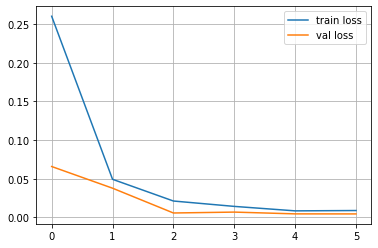

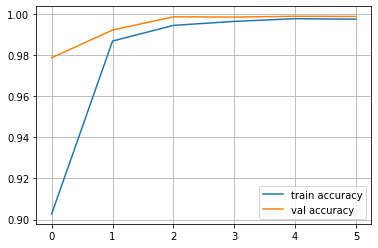

In [6]:
Y_pred = numpy.round(model.predict_generator(test_gen))

print(classification_report(Y_test, Y_pred))
print_metrics(confusion_matrix(Y_test, Y_pred), Y_test)
print()
score = model.evaluate_generator(test_gen, verbose=False)
print('Test loss:\t{:.6f}'.format(score[0]))
print('Test accuracy:\t{:.6f}'.format(score[1]))

plot_loss(history)
plot_accuracy(history)

## Discussion
...

In [8]:
model.save('LSTM_word2vec_SMOTE.h5')